In [1]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Load processed T20 dataset
t20_df = pd.read_csv("../data/processed/t20s_combined.csv")
print("Shape of dataset:", t20_df.shape)
t20_df.head()


C:\Users\sundu\AppData\Local\Temp\ipykernel_40052\2952335758.py:12: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  t20_df = pd.read_csv("../data/processed/t20s_combined.csv")


Shape of dataset: (929433, 22)


,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1001349,2016/17,2017-02-17,Melbourne Cricket Ground,1,0.1,Australia,Sri Lanka,AJ Finch,M Klinger,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1001349,2016/17,2017-02-17,Melbourne Cricket Ground,1,0.2,Australia,Sri Lanka,AJ Finch,M Klinger,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1001349,2016/17,2017-02-17,Melbourne Cricket Ground,1,0.3,Australia,Sri Lanka,AJ Finch,M Klinger,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1001349,2016/17,2017-02-17,Melbourne Cricket Ground,1,0.4,Australia,Sri Lanka,M Klinger,AJ Finch,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1001349,2016/17,2017-02-17,Melbourne Cricket Ground,1,0.5,Australia,Sri Lanka,M Klinger,AJ Finch,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Drop rows where wicket_type is null (no dismissal)
df_model = t20_df.dropna(subset=['wicket_type'])

# Select features and label
features = ['ball', 'batting_team', 'bowling_team', 'striker', 'non_striker', 'runs_off_bat']
label = 'wicket_type'

# Encode label column
label_encoder = LabelEncoder()
df_model[label] = label_encoder.fit_transform(df_model[label])
y = df_model[label].astype(int)

# Encode features
df_model_encoded = df_model.copy()
feature_encoders = {}

for col in features:
    if df_model_encoded[col].dtype == 'object':
        le = LabelEncoder()
        df_model_encoded[col] = le.fit_transform(df_model_encoded[col])
        feature_encoders[col] = le

# Train-test split
X = df_model_encoded[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 41269
Testing samples: 10318


C:\Users\sundu\AppData\Local\Temp\ipykernel_40052\3328795965.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model[label] = label_encoder.fit_transform(df_model[label])


Random Forest Accuracy: 50.41%

Classification Report:

                       precision    recall  f1-score   support

               bowled       0.32      0.17      0.22      2427
               caught       0.53      0.86      0.66      5141
    caught and bowled       0.09      0.01      0.02       360
   hit the ball twice       0.00      0.00      0.00         0
           hit wicket       0.00      0.00      0.00         9
                  lbw       0.15      0.03      0.05       897
obstructing the field       0.00      0.00      0.00         1
         retired hurt       0.00      0.00      0.00         9
      retired not out       0.00      0.00      0.00         2
          retired out       0.00      0.00      0.00         3
              run out       0.76      0.33      0.46      1060
              stumped       0.04      0.00      0.01       409

             accuracy                           0.50     10318
            macro avg       0.16      0.12      0.12     103

C:\Users\sundu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sundu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sundu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sundu\anaconda3\Lib\site-package

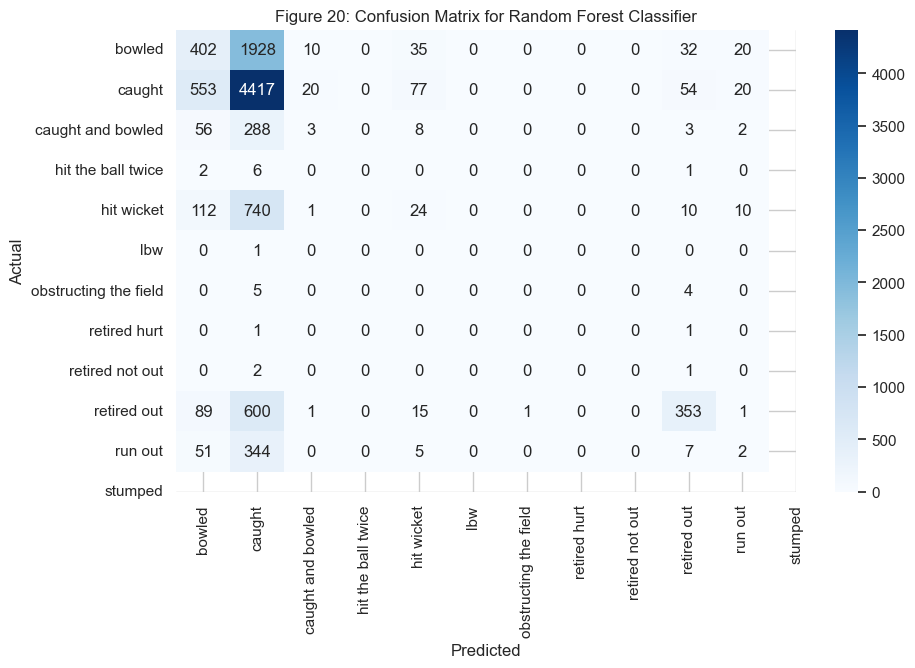

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy: {:.2f}%".format(accuracy * 100))

# Classification report
print("\nClassification Report:\n")
# Re-create label encoder to ensure target names match
labels = sorted(y.unique())
target_names = label_encoder.inverse_transform(labels)

print(classification_report(y_test, y_pred, labels=labels, target_names=target_names))

# Confusion Matrix
plt.figure(figsize=(10, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Figure 20: Confusion Matrix for Random Forest Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [15]:
import joblib

# Save the trained model locally
joblib.dump(rf_model, "../models/random_forest_model.pkl")

print("Random Forest model saved.")


Random Forest model saved.


In [17]:
!pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 4.2 MB/s eta 0:00:36
   ---------------------------------------- 1.8/150.0 MB 5.3 MB/s eta 0:00:28
    --------------------------------------- 3.7/150.0 MB 6.8 MB/s eta 0:00:22
   - -------------------------------------- 5.5/150.0 MB 7.8 MB/s eta 0:00:19
   - -------------------------------------- 7.1/150.0 MB 8.1 MB/s eta 0:00:18
   -- ------------------------------------- 9.4/150.0 MB 8.2 MB/s eta 0:00:18
   -- ------------------------------------- 11.0/150.0 MB 8.0 MB/s eta 0:00:18
   --- ------------------------------------ 12.6/150.0 MB 8.0 MB/s eta 0:00:18
   --- ------------------------------------ 13.1/150.0 MB 7.5 MB/s eta 0:00:19
   ---- ----------------------------------- 15.2/150.0 MB 7.6 MB/s eta 0:00:18
   ---- ----------------------------------- 16.8/150.0 MB 7.5 MB/s eta 0:00:18
   ---- ----------------------------------- 18.6/150.0 MB 7.6 MB/s

C:\Users\sundu\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:14:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 52.77%

Classification Report:

                       precision    recall  f1-score   support

               bowled       0.36      0.10      0.15      2427
               caught       0.53      0.95      0.68      5141
    caught and bowled       0.00      0.00      0.00       360
   hit the ball twice       0.00      0.00      0.00         0
           hit wicket       0.00      0.00      0.00         9
                  lbw       0.21      0.01      0.01       897
obstructing the field       0.00      0.00      0.00         1
         retired hurt       0.00      0.00      0.00         9
      retired not out       0.00      0.00      0.00         2
          retired out       0.00      0.00      0.00         3
              run out       0.88      0.33      0.48      1060
              stumped       0.00      0.00      0.00       409

             accuracy                           0.53     10318
            macro avg       0.16      0.11      0.11     10318
   

C:\Users\sundu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sundu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sundu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sundu\anaconda3\Lib\site-package

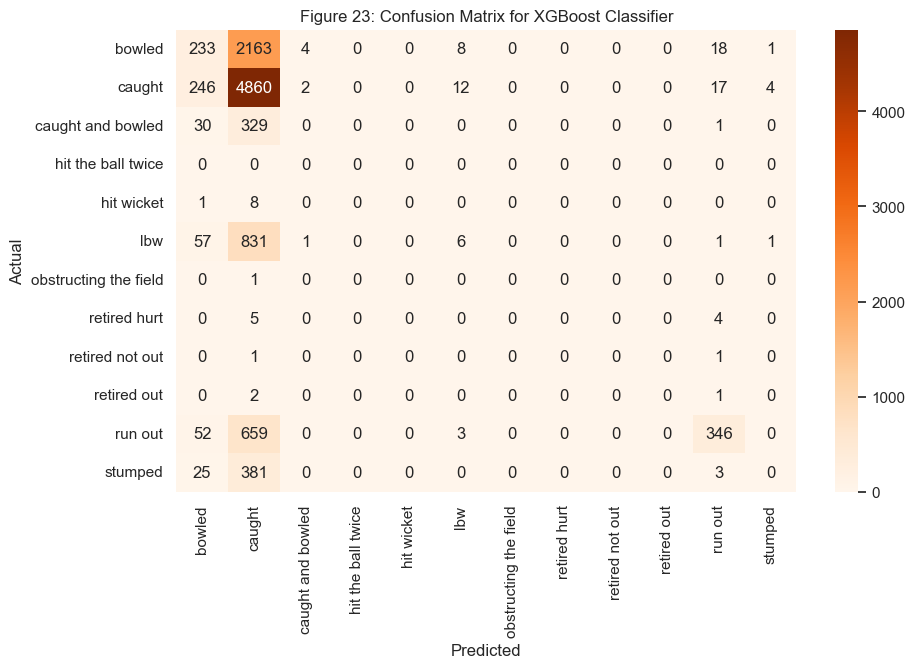

In [29]:
from xgboost import XGBClassifier

# Train XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy: {:.2f}%".format(accuracy * 100))

# Classification Report
labels = sorted(y.unique())
target_names = label_encoder.inverse_transform(labels)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_xgb, labels=labels, target_names=target_names))

# Confusion Matrix
plt.figure(figsize=(10, 6))
cm = confusion_matrix(y_test, y_pred_xgb, labels=labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=target_names,
            yticklabels=target_names)
plt.title("Figure 23: Confusion Matrix for XGBoost Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
